# An In Depth Analysis Of Possible Asteroid Impacts With Earth. 

### By Sebastian Goslin CDS 101-001

The following data analysis will answer specific questions using data collected from NASA's **Near Earth Object Program** at the **Jet Propulsion Lab, California Institute of Technology.** The data is automatically organized and categorized using the automated collision monitoring program: **Sentry**. 

This analysis is designed to show highlight some of the automated processes that Sentry goes through in prioritizing objects that have a possibility of being a hazard to Earth. More specifically the data analysis will answer the following questions as well as visualize the data set with plots:

1. Which of the asteroids are the largest, and of those which have the highest impact probability, as well as what is the average size of the asteroids? This question is broken up into three parts a, b, and c. 
2. Which objects have periods that end on or near the year 2017? 
3. Which objects have the are the fastest, and which ones are the largest and fastest? 
4. Which asteroids score the highest on the Palermo scale, what’s the average Palermo score?
5. Which object is closest to us?

## 1. Data Import and Cleaning.  

The dataset is imported into a tidyverse library and read as a tibble using the **`read_csv()`** function.

The "untidy'd" data set, with more columns that will be needed for the data analysis, as columns that contain strings and integers, which need to be read as integers. i.e. `Maximum Torino Scale` is read as a string but the data is in integers, or has NA values. while The Torino scale won't be used for this analysis, an example of cleaning as follows:

1. First, the dataset needs to have the NA values omitted this is done in the line below. Which can be seen in the new variable **`impacts`** which is stripped of NA values using the **`is.na()`** function.
2. The column values that are strings or "chr" must read as integers. Since this we are not using the Torino scale it would look like so:

    impacts <- as.numeric(`Maximum Torino Scale`)
    
I created a variable that isolated the Torino column and converted its data values to integers, which would have allowed me to order them specifically. The reason the Torino scale will not be utilized in the analysis is explained in the answer to question 4.  

**Loading tidyverse**

In [2]:
.libPaths(new = "~/Rlibs")
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


**Reading the imported datset from a** `.csv` **file into tidyverse tibble. By creating a variable** `impacts` **to handle the dataset.**

In [3]:
impacts <- read_csv("impacts.csv")

Parsed with column specification:
cols(
  `Object Name` = col_character(),
  `Period Start` = col_integer(),
  `Period End` = col_integer(),
  `Possible Impacts` = col_integer(),
  `Cumulative Impact Probability` = col_double(),
  `Asteroid Velocity` = col_double(),
  `Asteroid Magnitude` = col_double(),
  `Asteroid Diameter (km)` = col_double(),
  `Cumulative Palermo Scale` = col_double(),
  `Maximum Palermo Scale` = col_double(),
  `Maximum Torino Scale` = col_character()
)


In [3]:
print(impacts)

# A tibble: 683 × 11
   `Object Name` `Period Start` `Period End` `Possible Impacts`
           <chr>          <int>        <int>              <int>
1       2006 WP1           2017         2017                  1
2        2013 YB           2017         2046                 23
3        2008 US           2017         2062                 30
4     2010 VR139           2017         2076                 24
5     2015 ME131           2017         2096                 85
6      2010 XB73           2017         2110                 55
7     2005 TM173           2017         2111                123
8     2006 SF281           2017         2111                514
9     2010 VP139           2017         2112                350
10    2014 HR197           2017         2112                187
# ... with 673 more rows, and 7 more variables: `Cumulative Impact
#   Probability` <dbl>, `Asteroid Velocity` <dbl>, `Asteroid Magnitude` <dbl>,
#   `Asteroid Diameter (km)` <dbl>, `Cumulative Palermo Scale` <d

**Using the** `select()` **function, asteroids and the Torino scale are separated and shown as two columns side by side, we can see the that the torino scale data is read as strings even though its collected as integers.**

In [4]:
print(select(impacts, `Object Name`, `Maximum Torino Scale`))

# A tibble: 683 × 2
   `Object Name` `Maximum Torino Scale`
           <chr>                  <chr>
1       2006 WP1                      0
2        2013 YB                      0
3        2008 US                      0
4     2010 VR139                      0
5     2015 ME131                      0
6      2010 XB73                      0
7     2005 TM173                      0
8     2006 SF281                      0
9     2010 VP139                      0
10    2014 HR197                      0
# ... with 673 more rows


**Creating a variable** `impacts.2` **of the new data set read from the original data csv file, to make data manipulation more efficient. As well as eliminating any empty values, as the dataset comes from NASA its been been organized fairly well previously.**

In [5]:
impacts.2 <- na.omit(impacts)

In [6]:
print(impacts.2)

# A tibble: 683 × 11
   `Object Name` `Period Start` `Period End` `Possible Impacts`
           <chr>          <int>        <int>              <int>
1       2006 WP1           2017         2017                  1
2        2013 YB           2017         2046                 23
3        2008 US           2017         2062                 30
4     2010 VR139           2017         2076                 24
5     2015 ME131           2017         2096                 85
6      2010 XB73           2017         2110                 55
7     2005 TM173           2017         2111                123
8     2006 SF281           2017         2111                514
9     2010 VP139           2017         2112                350
10    2014 HR197           2017         2112                187
# ... with 673 more rows, and 7 more variables: `Cumulative Impact
#   Probability` <dbl>, `Asteroid Velocity` <dbl>, `Asteroid Magnitude` <dbl>,
#   `Asteroid Diameter (km)` <dbl>, `Cumulative Palermo Scale` <d

## 2. Dataset Analysis, Exploration and Visulization. 

To begin the analysis, the data set is reduced to the columns that are pertinent to the data analysis using the `select()` function.

1. Object Name
2. Period End
3. Possible Impacts
4. Cumulative Impact Probability (CIP)
5. Asteroid Diameter (km)
6. Cumaltive Palermo Scale (CPS) 
7. Asteroid Magnitude 

In [7]:
Impacts_pert <- select(impacts.2, `Object Name`, `Period End`, `Possible Impacts`, `Cumulative Impact Probability`, 
                       `Asteroid Diameter (km)`, `Cumulative Palermo Scale`, `Asteroid Magnitude`, `Asteroid Velocity`)

New variable created called** `Impacts_pert` **that selects all the pertinent columns to the data analysis. The new variable will contain 8 columns and 683 rows.

In [8]:
print(Impacts_pert)

# A tibble: 683 × 8
   `Object Name` `Period End` `Possible Impacts`
           <chr>        <int>              <int>
1       2006 WP1         2017                  1
2        2013 YB         2046                 23
3        2008 US         2062                 30
4     2010 VR139         2076                 24
5     2015 ME131         2096                 85
6      2010 XB73         2110                 55
7     2005 TM173         2111                123
8     2006 SF281         2111                514
9     2010 VP139         2112                350
10    2014 HR197         2112                187
# ... with 673 more rows, and 5 more variables: `Cumulative Impact
#   Probability` <dbl>, `Asteroid Diameter (km)` <dbl>, `Cumulative Palermo
#   Scale` <dbl>, `Asteroid Magnitude` <dbl>, `Asteroid Velocity` <dbl>


## Question 1: 
## a: Which of the asteroids are the largest?
## b: Of those which have the highest impact probability? 
## c: What is the average size of the objects?

A new variable: `Asteroid_Size`, which compares the three columns `Asteroid Diameter (km)`, `Cumulative Impact Probability` and from largest to smallest in descending order. The diameter can be estimated from the magnitude of the asteroid.

## 1a:

**Looking at the tibble, which we can see the largest is asteroid _2011 SR52_, but in the second line of code, we see that asteroid that has the highest chance of hitting us _2010 RF12_, with the lowsest chance belonging to _2014 HN197_.**

In [9]:
Asteroid_Size <- select(Impacts_pert, `Object Name`, 
                        `Asteroid Diameter (km)`, `Cumulative Impact Probability`)

print(arrange(Asteroid_Size, desc(`Asteroid Diameter (km)`), 
              `Cumulative Impact Probability`))

# A tibble: 683 × 3
     `Object Name` `Asteroid Diameter (km)` `Cumulative Impact Probability`
             <chr>                    <dbl>                           <dbl>
1        2011 SR52                    2.579                         7.6e-10
2       2010 AU118                    1.900                         1.8e-08
3  29075 (1950 DA)                    1.300                         1.2e-04
4         2017 CH1                    0.900                         2.3e-10
5       2005 GV190                    0.870                         1.2e-10
6        2001 CA21                    0.679                         6.5e-09
7          1979 XB                    0.657                         9.9e-07
8        2012 BG96                    0.570                         2.4e-09
9        2014 MV67                    0.541                         1.8e-09
10       2013 JA17                    0.510                         5.5e-09
# ... with 673 more rows


In [10]:
Asteroid_critchance <- select(Impacts_pert, `Object Name`, `Cumulative Impact Probability`, `Asteroid Diameter (km)`)

print(arrange(Asteroid_critchance, desc(`Cumulative Impact Probability`), `Asteroid Diameter (km)`))

print(arrange(Asteroid_critchance, `Cumulative Impact Probability`, `Asteroid Diameter (km)`))

# A tibble: 683 × 3
      `Object Name` `Cumulative Impact Probability` `Asteroid Diameter (km)`
              <chr>                           <dbl>                    <dbl>
1         2010 RF12                          0.0650                    0.007
2         2006 JY26                          0.0097                    0.007
3        2000 SG344                          0.0022                    0.037
4          2012 HG2                          0.0020                    0.014
5         2016 RD34                          0.0019                    0.011
6           2015 YJ                          0.0018                    0.007
7  410777 (2009 FD)                          0.0016                    0.160
8         2014 JR24                          0.0012                    0.005
9          2016 VB1                          0.0012                    0.006
10        2011 AM37                          0.0010                    0.004
# ... with 673 more rows
# A tibble: 683 × 3
   `Object 

## **1b: **

**This can be answered with a plot of the two columns "`Asteroid Diameter (km)`" on the x axis, and "`Cumulative Impact Probability`" on the y axis.**

**As illustrated by the plot, the plot is very stretched out due to the high probability of _2010 RF12_ and the few asteroids that have diameters greater than 1 km. Using the zoom function** `coord_cartesian()`,** the plot is better able to be visualized. We can zoom in on that same plot to see all asteroids smaller than 50 meters, the datasets mean size.**

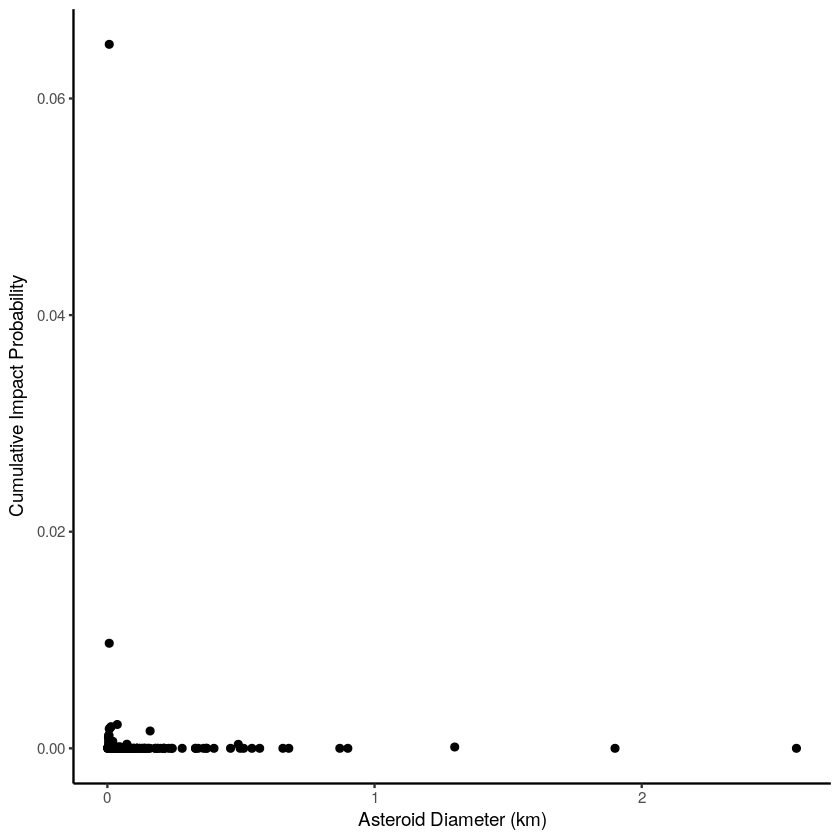

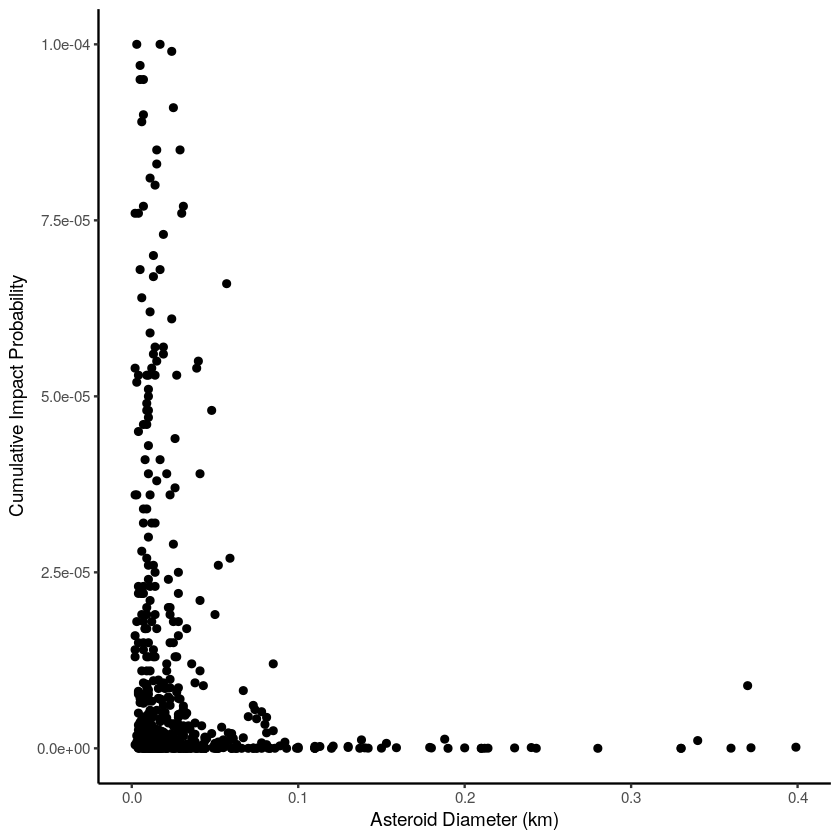

In [11]:
Asteroid.Size.plot <- select(Asteroid_Size, `Asteroid Diameter (km)`, 
                             `Cumulative Impact Probability`) # The variable to plot for 1b

size_plot <- ggplot(Asteroid.Size.plot) +
geom_point(mapping = aes(x = `Asteroid Diameter (km)`, 
                         y = `Cumulative Impact Probability`))

zoom1 <- ggplot(Asteroid.Size.plot) + 
geom_point(mapping = aes(x = `Asteroid Diameter (km)`, 
                         y = `Cumulative Impact Probability`))

size_plot + theme_classic()
zoom1 + coord_cartesian(xlim = c(0,0.40), 
                        ylim = c(1.1e-10, 1e-04)) + theme_classic()# The zoom variable is using the function coord_cartesian(). 

## 1c:

We find that the mean of the asteroid size is 0.494 km or 49.4 m. To put this size into perspecticve the Chelyabinsk meteorite that hit Russia in 2013 was ~20m in diameter. It injured over 1000 people and had force of 230 kT (kilotons), thats 20 times the power of the nuclear weapon that level Hiroshima, if one of these objects were to strike us, a metor of 50m would have an energy of **5.2 mT (megatons)**. 

In [12]:
Average.Size <- select(Impacts_pert, `Asteroid Diameter (km)`)

mean.notrim <- colMeans(Average.Size, na.rm = FALSE, dims = 1)

trimmed.mean <- round(mean.notrim, digits = 4)
print(trimmed.mean)

Asteroid Diameter (km) 
                0.0494 


## Question 2: Which objects have periods that end on or near the year 2017?

A new variable `Asteroid_Period` is created to show which asteroid has the soonest period end; in this case the asteroid is _2006 WP1_, if its CIP was high this object could be hitting us this year!

In [13]:
Asteroid_Period <- select(Impacts_pert, `Object Name`, `Period End`, 
                          `Asteroid Diameter (km)`, `Asteroid Magnitude`)
print(Asteroid_Period, desc(`Object Name`, `Period End`, 
                            `Asteroid Diameter (km)`, `Asteroid Magnitude`))

# A tibble: 683 × 4
   `Object Name` `Period End` `Asteroid Diameter (km)` `Asteroid Magnitude`
           <chr>        <int>                    <dbl>                <dbl>
1       2006 WP1         2017                    0.007                 28.3
2        2013 YB         2046                    0.002                 31.4
3        2008 US         2062                    0.002                 31.4
4     2010 VR139         2076                    0.016                 26.7
5     2015 ME131         2096                    0.497                 19.2
6      2010 XB73         2110                    0.110                 22.5
7     2005 TM173         2111                    0.052                 24.1
8     2006 SF281         2111                    0.020                 26.2
9     2010 VP139         2112                    0.007                 28.5
10    2014 HR197         2112                    0.014                 26.9
# ... with 673 more rows


## Question 3: Which objects are the fastest, which ones are the largest and what’s the average speed?

Following the same order that we took with the previous questions we isolate the asteroids and their individual velocities and order them from slowest to fastest, with this we can also find out what the average speed of the asteroids is as well as if it shows any kind of trend, using the `summarise()` function we can summarise all the values into a new tibble and use the `mean() ` function to find the average as well as the `min(), max()` functions in the `summarise()` function.

We see that the min max and mean velocities are:

**mean** = 11.46258

**min** = 0.34

**max** = 39.47

After using the `filter()` and plotting the function the data shows a trend that the smaller asteroids have a higher velocity. While the larger ones have lower velocities. The values obtained by the `summarise()` function are plotted below. 

In [14]:
Asteroid_Size_vs_Velocity1 <- select(impacts.2, `Object Name`, `Asteroid Velocity`, `Asteroid Diameter (km)`)

print(arrange(Asteroid_Size_vs_Velocity1, desc(`Asteroid Velocity`), `Asteroid Diameter (km)`))

# A tibble: 683 × 3
   `Object Name` `Asteroid Velocity` `Asteroid Diameter (km)`
           <chr>               <dbl>                    <dbl>
1       2008 FF5               39.47                    0.081
2       2016 GU2               39.17                    0.052
3      2011 BT59               37.84                    0.240
4        2013 WM               35.41                    0.055
5     2007 EE126               30.80                    0.025
6      2001 CA21               30.68                    0.679
7     2015 KH160               29.20                    0.018
8      2010 JH80               26.90                    0.042
9       2008 PK9               26.44                    0.078
10       2006 JE               26.36                    0.058
# ... with 673 more rows


In [15]:
summarise(Asteroid_Size_vs_Velocity1, mean(`Asteroid Velocity`), 
                      min(`Asteroid Velocity`), 
                      max(`Asteroid Velocity`))

mean(`Asteroid Velocity`) min(`Asteroid Velocity`) max(`Asteroid Velocity`)
1 11.46258                  0.34                     39.47

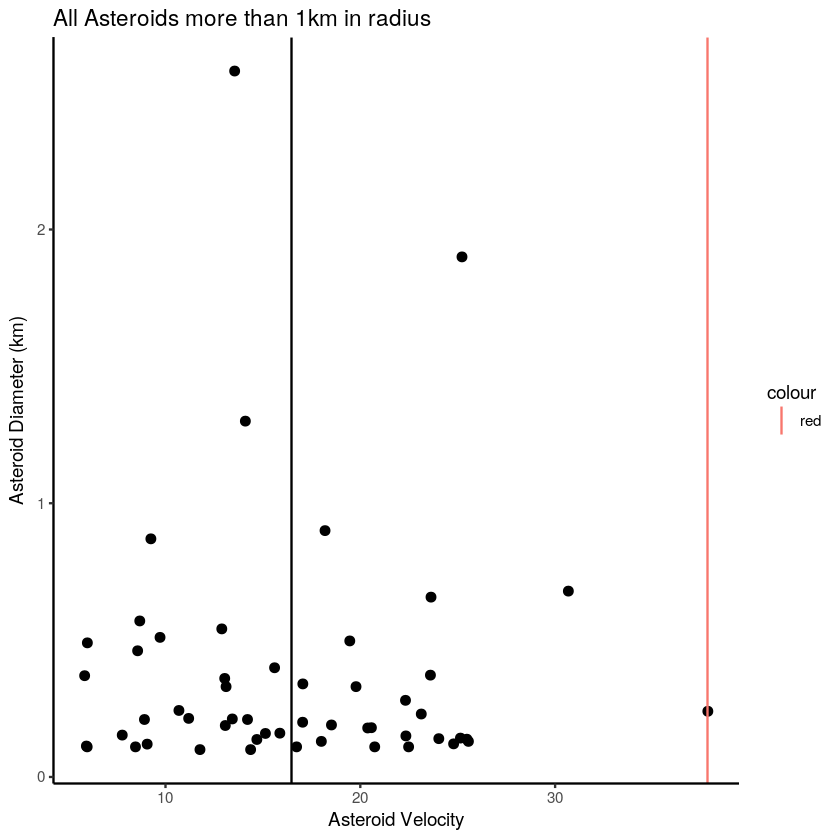

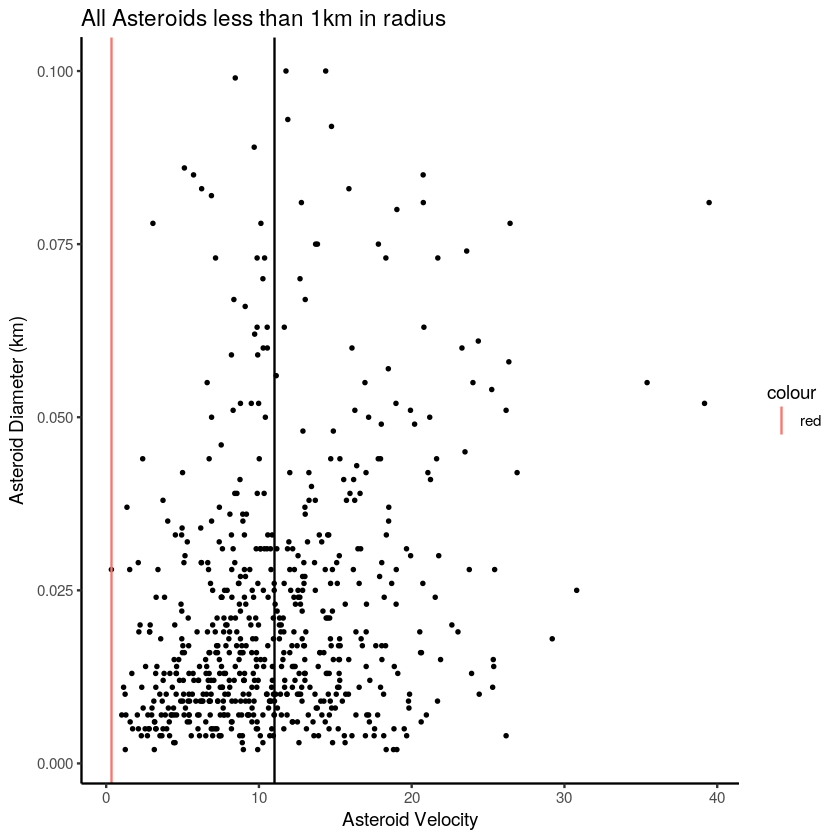

In [16]:
Asteroid_Size_vs_Velocity2 <- select(impacts.2, `Object Name`, `Asteroid Velocity`, `Asteroid Diameter (km)`)

less_than_1km <- filter(Asteroid_Size_vs_Velocity2, `Asteroid Diameter (km)` <= 0.1)
more_than_1km <- filter(Asteroid_Size_vs_Velocity2, `Asteroid Diameter (km)` >= 0.1)

LT <- ggplot(less_than_1km, aes(x = `Asteroid Velocity`, y = `Asteroid Diameter (km)`)) +
    geom_point(size = 0.5) + labs(title = "All Asteroids less than 1km in radius") +
        geom_vline(aes(xintercept = min(`Asteroid Velocity`), color = "red")) +
            geom_vline(aes(xintercept = mean(`Asteroid Velocity`))) + theme_classic()

GT <- ggplot(more_than_1km, aes(x = `Asteroid Velocity`, y = `Asteroid Diameter (km)`)) +
    geom_point(size = 2) + labs(title = "All Asteroids more than 1km in radius") +
        geom_vline(aes(xintercept = max(`Asteroid Velocity`), color = "red")) +
            geom_vline(aes(xintercept = mean(`Asteroid Velocity`))) + theme_classic()

GT 
LT

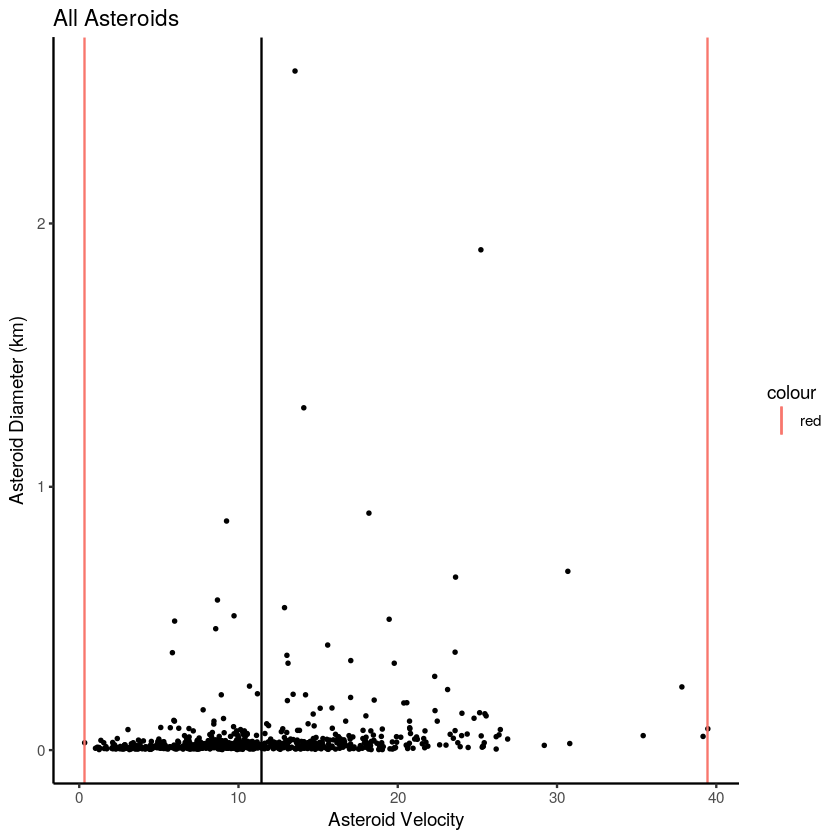

In [17]:
vplot <- select(Asteroid_Size_vs_Velocity2, `Asteroid Velocity`, `Asteroid Diameter (km)`)

big_plot <-ggplot(vplot, aes(x = `Asteroid Velocity`, y = `Asteroid Diameter (km)`)) +
    geom_point(size = 0.5) + labs(title = "All Asteroids") +
        geom_vline(aes(xintercept = min(`Asteroid Velocity`), color = "red")) +
            geom_vline(aes(xintercept = mean(`Asteroid Velocity`))) +
                geom_vline(aes(xintercept = max(`Asteroid Velocity`), color = "red")) + theme_classic()

big_plot

## Question 4: Which asteroids score the highest on the Palermo scale, whats the average Palermo score?

_The Palermo Scale_ is a more descriptive version of the other scale used in the dataset _The Torino Scale_, which is used for non-scientific audiences. The scale measures the probability of the asteroid impact and the energy in megatons of the object. 

The scale operates on the premise that a "safe" object has a negative score, and as soon as it is upgrade to either zero or higher than its threat celling is raised.

Solving question four involves not just making sure that every value is negative (thankfully they are), but also the average of scores. While it may be negative it doesn’t necessarily mean well. A high negative mean is an indication that all the objects have such high negative scores that the probability of any hitting us is very slim a good example is the calculated mean of -6.51. 

While a low negative mean of say; -2, would indicate that the overall number of objects have a higher probability of hitting us. 

In [18]:
P_Scale <- select(Impacts_pert, `Object Name`, `Cumulative Palermo Scale`)

print(arrange(P_Scale, `Object Name`, desc(`Cumulative Palermo Scale`)))

P_Score <- select(P_Scale, `Cumulative Palermo Scale`)

Mean_Score <- mutate(P_Scale, "CPS Mean" = colMeans(P_Score, na.rm = FALSE, dims = 1))

print(Mean_Score)

# A tibble: 683 × 2
              `Object Name` `Cumulative Palermo Scale`
                      <chr>                      <dbl>
1  101955 Bennu (1999 RQ36)                      -1.71
2                   1979 XB                      -2.75
3                   1991 BA                      -6.03
4                   1991 VG                      -6.46
5                  1993 HP1                      -6.87
6                   1993 UA                      -6.72
7                   1994 GK                      -3.82
8                   1994 GV                      -5.14
9                   1995 CS                      -4.73
10                 1996 TC1                      -5.08
# ... with 673 more rows
# A tibble: 683 × 3
   `Object Name` `Cumulative Palermo Scale` `CPS Mean`
           <chr>                      <dbl>      <dbl>
1       2006 WP1                      -8.31  -6.511552
2        2013 YB                      -6.60  -6.511552
3        2008 US                      -6.48  -6.511552


## Question 5: Which object is closest to us?

In astronomy, an Object's magnitude is an indicator of how far it is from us. The magnitude is its brightness; it’s essentially a reflectivity index, and its measure in two forms _Apparent Magnitude_ and _Absolute Magnitude_. The more accurate of the two is the absolute magnitude (measured as **H** mathematically), as it is obtained to a high degree of precision from astronomical observatories on Earth. 

By using the **H** factor of an asteroid its distance can be mathematically obtained using the formula:

D = 10<sup>(Apparent Magnitude - H + 5)/5</sup>

Using an assumed apparent magnitude of -2.50 (the average magnitude of objects in the asteroid belt), we can estimate the distance to each asteroid using the `mutate()` function. 

This equation outputs the distance in parsec’s, there for it must be converted to a more manageable unit of measurement, in this case we will use the AU or Astronomical Unit which is ~150,000,000 kilometers. 

1 parsec, is 206265 AU.

Thus the farthest asteroid is ~495 AU away or out in heliosphere, also conveniently this is also the largest asteroid: _2011 SR52_ which explains why we can see it form so far away. 

The closest asteroid is _2016 QY84_ at 47 million kilometers from us!

We can see in the two plots, namely that there is a linear progression in size vs distance and the further out it gets the less asteroids there are, but also the larger they become.  

In [19]:
Amag <- select(impacts.2, `Object Name`, `Asteroid Magnitude`, `Asteroid Diameter (km)`)

Distance <- mutate(Amag, `Asteroid Distance` = (10^((-2.5-`Asteroid Magnitude`+5)/5))*206265)

print(arrange(Distance, desc(`Asteroid Distance`)))

Distance_Mean <- select(Distance, `Asteroid Distance`)

Mean_Distance <- colMeans(Distance_Mean, na.rm = FALSE, dims = 1)

print(Mean_Distance)

# A tibble: 683 × 4
     `Object Name` `Asteroid Magnitude` `Asteroid Diameter (km)`
             <chr>                <dbl>                    <dbl>
1        2011 SR52                 15.6                    2.579
2       2010 AU118                 16.2                    1.900
3  29075 (1950 DA)                 17.6                    1.300
4         2017 CH1                 17.9                    0.900
5       2005 GV190                 18.0                    0.870
6        2001 CA21                 18.5                    0.679
7          1979 XB                 18.6                    0.657
8        2012 BG96                 18.9                    0.570
9        2014 MV67                 19.0                    0.541
10       2013 JA17                 19.1                    0.510
# ... with 673 more rows, and 1 more variables: `Asteroid Distance` <dbl>
Asteroid Distance 
          9.40322 


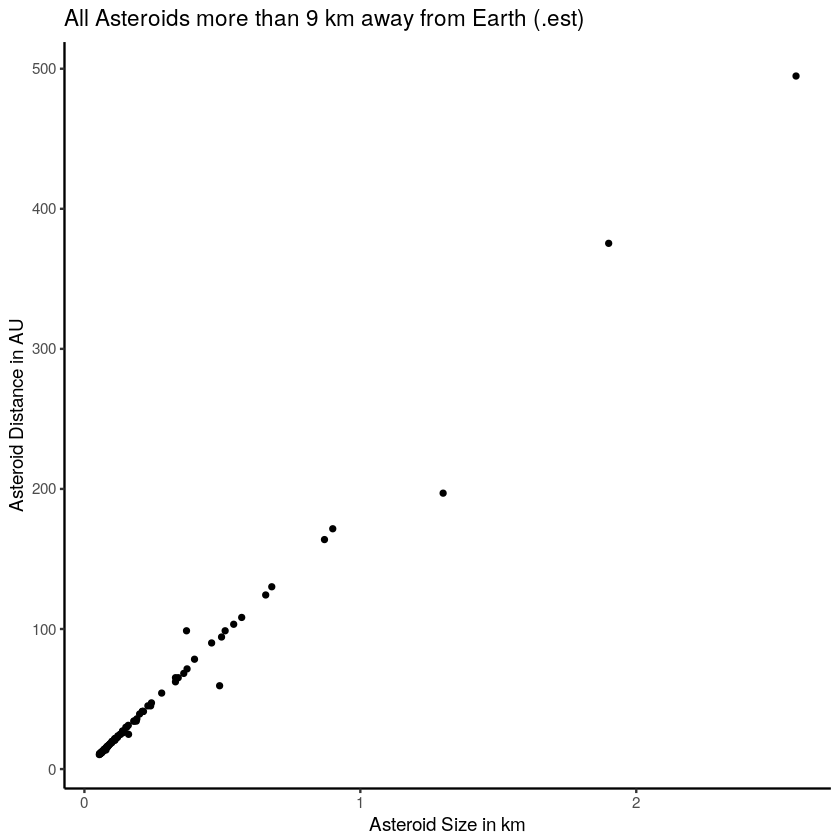

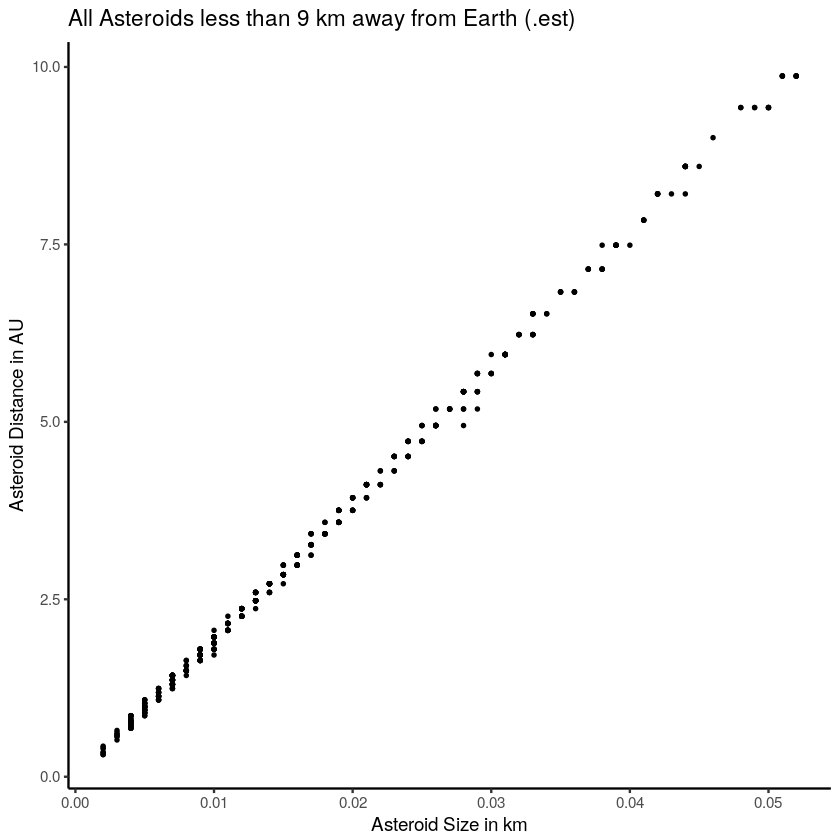

In [20]:
Asteroid_Size_vs_Distance <- select(Distance, `Object Name`, `Asteroid Distance`, `Asteroid Diameter (km)`)

less_than_9km <- filter(Asteroid_Size_vs_Distance,`Asteroid Distance` <= 10)
more_than_9km <- filter(Asteroid_Size_vs_Distance,`Asteroid Distance` >= 10)

DLT <- ggplot(less_than_9km, aes(x = `Asteroid Diameter (km)`, y = `Asteroid Distance`)) + 
        geom_point(size = 0.5) + labs(x = "Asteroid Size in km", 
                                      y = "Asteroid Distance in AU", 
                                      title = "All Asteroids less than 9 km away from Earth (.est)") + theme_classic()

DGT <- ggplot(more_than_9km, aes(x = `Asteroid Diameter (km)`, y = `Asteroid Distance`)) + 
        geom_point(size = 1) + labs(x = "Asteroid Size in km", 
                                      y = "Asteroid Distance in AU", 
                                    title = "All Asteroids more than 9 km away from Earth (.est)") + theme_classic()

DGT
DLT

# 3. Dataset Summary

This dataset has proved to be extremely useful, also given that it is only two months old there is plenty of room for more in depth analysis and no doubt could provide a deeper insight on the Asteroids that may pose a threat to us one day. It has proved useful in providing a platform for not only learning R, but in seeing the capabilities of the language in interpreting data. 

This data was downloaded from NASA's webpage on kaggle: https://www.kaggle.com/nasa/asteroid-impacts 

The asteroid orbit and impact risk data was collected by NASA's Near Earth Object Program at the Jet Propulsion Laboratory (California Institute of Technology).

All mathematical formulas referenced from my astronomy textbook: _Foundations of Modern Cosmology by Hawley and Holcomb._